In [52]:
import pysam
from pysam import VariantFile
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm

In [2]:
vcf_in = VariantFile("eqtl_anal/ALL.wgs.mergedSV.v8.20130502.svs.genotypes.vcf")  # auto-detect input format

In [48]:
print(vcf_in.header)

##fileformat=VCFv4.1
##FILTER=<ID=PASS,Description="All filters passed">
##reference=ftp://ftp.1000genomes.ebi.ac.uk//vol1/ftp/technical/reference/phase2_reference_assembly_sequence/hs37d5.fa.gz
##INFO=<ID=TSD,Number=1,Type=String,Description="Precise Target Site Duplication for bases, if unknown, value will be NULL">
##INFO=<ID=SVTYPE,Number=1,Type=String,Description="Type of structural variant">
##INFO=<ID=MSTART,Number=1,Type=Integer,Description="Mitochondrial start coordinate of inserted sequence">
##INFO=<ID=MLEN,Number=1,Type=Integer,Description="Estimated length of mitochondrial insert">
##INFO=<ID=MEND,Number=1,Type=Integer,Description="Mitochondrial end coordinate of inserted sequence">
##INFO=<ID=MEINFO,Number=4,Type=String,Description="Mobile element info of the form NAME,START,END<POLARITY; If there is only 5' OR 3' support for this call, will be NULL NULL for START and END">
##INFO=<ID=SVLEN,Number=.,Type=Integer,Description="Difference in length between REF and ALT allele

In [3]:
gene_express = pd.read_csv("eqtl_anal/GD462.GeneQuantRPKM.50FN.samplename.resk10.txt", sep='\t')  # auto-detect input format

In [4]:
n_skip=0
with open("eqtl_anal/ALL.wgs.mergedSV.v8.20130502.svs.genotypes.vcf", 'r') as f:
    for line in f:
        if line[:2] == '##':
            n_skip+=1
        else:
            break

In [5]:
vcf_csv = pd.read_csv("eqtl_anal/ALL.wgs.mergedSV.v8.20130502.svs.genotypes.vcf", skiprows=n_skip, sep='\t') 

/home/marek/anaconda3/envs/bioinf/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
vcf_csv.shape

(68818, 2513)

In [12]:
vcf_csv['ID'].unique().shape

(68818,)

In [9]:
# per jeden gen i jeden variant

In [7]:
gene_express.shape

(23722, 466)

In [9]:
gene_express.head()

,TargetID,Gene_Symbol,Chr,Coord,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,...,NA20810,NA20811,NA20812,NA20813,NA20814,NA20815,NA20816,NA20819,NA20826,NA20828
0,ENSG00000152931.6,ENSG00000152931.6,5,59783540,0.101858,0.078110,0.048981,0.118597,0.004035,0.010925,...,0.088601,0.240010,0.137175,0.148494,0.038643,0.088509,0.029204,0.024423,0.044816,0.139186
1,ENSG00000183696.9,ENSG00000183696.9,7,48128225,8.183805,5.686911,2.434653,3.830894,6.612288,4.709646,...,13.428205,6.094500,12.536000,2.217262,3.573394,7.583364,4.052882,1.570378,4.900372,6.737308
2,ENSG00000139269.2,ENSG00000139269.2,12,57846106,1.199910,1.573572,0.521616,1.447225,3.565791,1.982681,...,3.225880,1.996067,2.854923,2.267343,1.331201,2.187895,1.004250,3.003316,1.984362,1.684954
3,ENSG00000169129.8,ENSG00000169129.8,10,116164515,0.831940,0.069778,0.931086,0.620941,1.660668,0.570481,...,1.023381,1.127852,0.774409,1.495854,0.895342,1.513521,0.826377,1.021201,0.952502,0.740565
4,ENSG00000134602.11,ENSG00000134602.11,X,131157293,27.646422,24.395572,16.445374,24.806650,25.113349,19.233988,...,25.079490,28.725528,24.450520,27.264069,26.912814,29.509210,26.462331,25.624009,25.707741,22.824957


In [10]:
vcf_csv.head()

,#CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,HG00096,...,NA21128,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144
0,1,645710,ALU_umary_ALU_2,A,<INS:ME:ALU>,.,.,AC=35;AF=0.00698882;AFR_AF=0;AMR_AF=0.0072;AN=...,GT,0|0,...,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0
1,1,668630,DUP_delly_DUP20532,G,<CN2>,.,PASS,AC=64;AF=0.0127795;AFR_AF=0.0015;AMR_AF=0;AN=5...,GT,0|0,...,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0
2,1,713044,DUP_gs_CNV_1_713044_755966,C,"<CN0>,<CN2>",.,PASS,"AC=3,206;AF=0.00059904,0.0411342;AFR_AF=0,0.03...",GT,0|0,...,0|0,0|0,0|0,0|0,0|0,0|0,2|0,0|0,2|0,0|2
3,1,738570,UW_VH_21763,G,<CN0>,100,PASS,AC=1;AF=0.00019968;AFR_AF=0;AMR_AF=0;AN=5008;C...,GT,0|0,...,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0
4,1,766600,UW_VH_5595,G,<CN0>,100,PASS,AC=188;AF=0.0375399;AFR_AF=0.0151;AMR_AF=0.062...,GT,0|0,...,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0


In [15]:
# vcf_csv.columns[9:]
# gene_express.columns[4:]
both_cols = list(set(gene_express.columns[4:].values).intersection( set(vcf_csv.columns[9:].values) ))

In [18]:
vcf_melt = vcf_csv[ both_cols + ['#CHROM', 'POS']].melt(id_vars=['#CHROM','POS'], value_name='mut').rename(columns={'#CHROM':'Chr'})

In [20]:
exp_melt = gene_express[ both_cols + ['Chr', 'Coord']].melt(id_vars=['Chr','Coord'], value_name='exp').rename(columns={'Coord':'POS'})

In [21]:
# itwerate over genes and check mutations net to it

In [26]:
gene_express.columns

Index(['TargetID', 'Gene_Symbol', 'Chr', 'Coord', 'HG00096', 'HG00097',
       'HG00099', 'HG00100', 'HG00101', 'HG00102',
       ...
       'NA20810', 'NA20811', 'NA20812', 'NA20813', 'NA20814', 'NA20815',
       'NA20816', 'NA20819', 'NA20826', 'NA20828'],
      dtype='object', length=466)

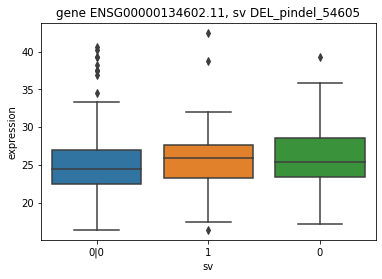

 p-values: 0.057


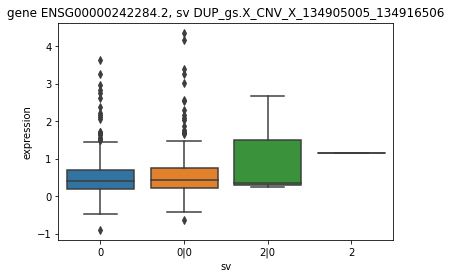

 p-values: 0.321


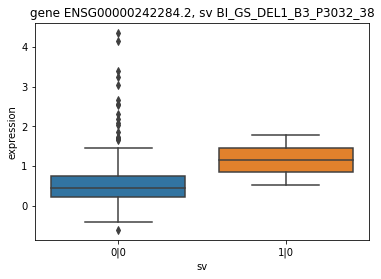

 p-values: 0.263


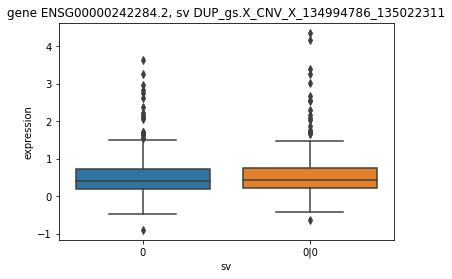

 p-values: 0.555


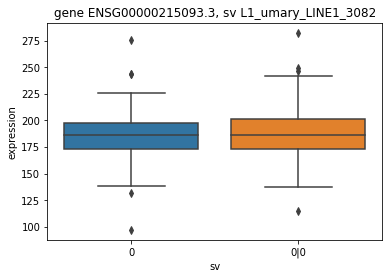

 p-values: 0.315


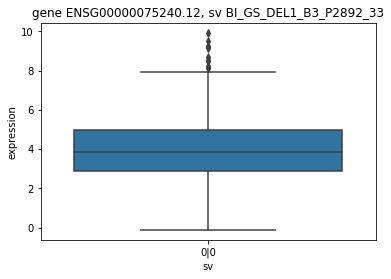

 p-values: nan


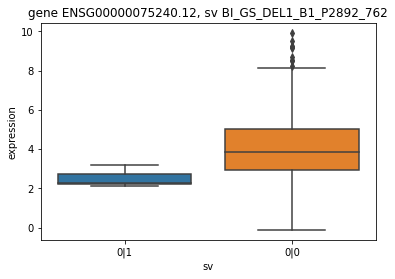

 p-values: 0.121


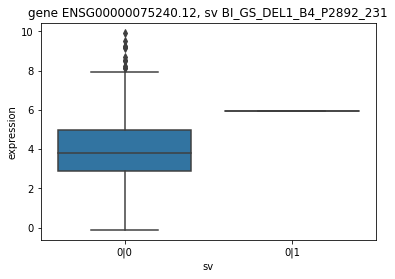

 p-values: 0.232


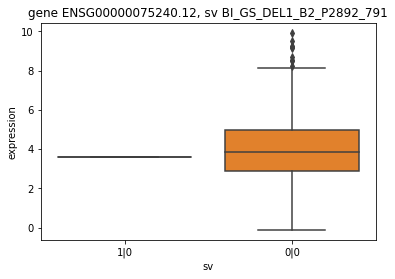

 p-values: 0.804


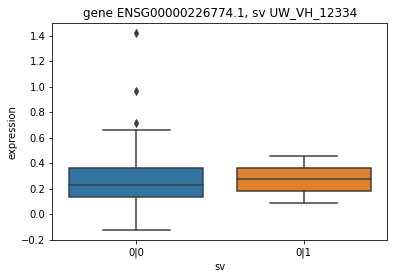

 p-values: 0.907


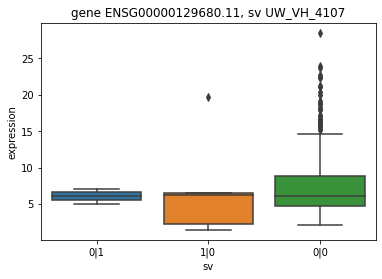

 p-values: 0.520


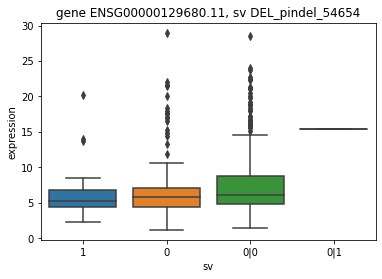

 p-values: 0.001


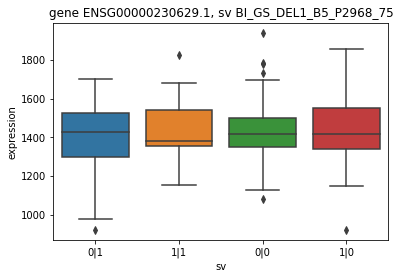

 p-values: 0.229


KeyboardInterrupt: 

In [61]:
for i, gene in gene_express[ both_cols + ['Chr', 'Coord', 'Gene_Symbol']].iterrows():
    #+-50k
    c = gene['Coord']
    ch = gene['Chr']
    g = gene['Gene_Symbol']
    
    for j, mutation in vcf_csv[ both_cols + ['ID']][
        (vcf_csv['POS']>c-50000)
        &(vcf_csv['POS']<c+50000)
        &(vcf_csv['#CHROM']==ch)].iterrows():
        
        
        df = pd.merge(mutation[both_cols], gene[both_cols], left_index=True, right_index=True)
        df.columns = ['sv', 'expression']        
        df = df[df['sv'].str.strip() != '.']
        df['expression'] = df['expression'].astype(float)
        
        grouped = df.groupby('sv').mean().sort_values('expression')
        
        ax = sns.boxplot(x="sv", y="expression", 
                         data=df,
                         order=grouped.index)
        plt.title(f'gene {g}, sv {mutation["ID"]}')
        plt.show()
        
        
        df['sv_num'] = 0
        
        for mut_i, mut in enumerate(grouped.index):
            df.loc[df['sv'] == mut, 'sv_num'] = mut_i
                    
        model = sm.OLS.from_formula("expression ~ sv_num", data=df)
        result = model.fit()
        print(f' p-values: {result.pvalues["sv_num"]:0.3f}')